# Thermal loads

Some of the energy requirements of users are drived my technologies that have time variant power consumption. Hot water boilers are an example of technologies that can have variant powers throughout time. To show case how loads as such can be modelled in RAMP, we take the example of a household thermal load for generating shower hot water.


In [1]:
# importing functions
from ramp import User, UseCase, load_data
import pandas as pd
import matplotlib.pyplot as plt

### Creating a user category and appliances

In [2]:
household = User()

RAMP allows the user to give variant power profile for an appliance with a daily resolution. In this case,the power property in an appliance should be given as a timeseries pd.DataFrame or np.array with daily profile (365 rows of data). For this exercise, we will use a built-in power profile for thermal load example that can be loaded using load_data util function:

<Axes: >

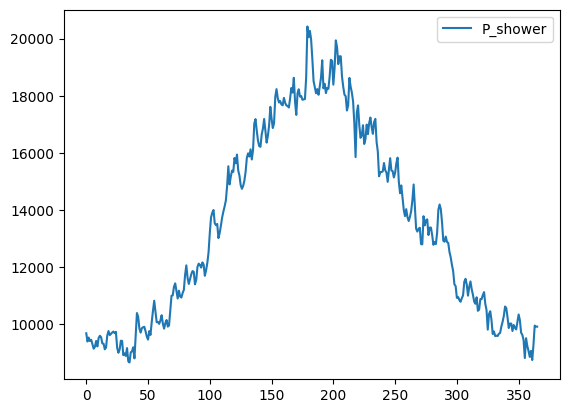

In [3]:
shower_power = load_data(example="shower")
# shower power distribution
shower_power.plot()

In [4]:
shower = household.add_appliance(
    name="Shower",
    number=1,
    power=shower_power, # pass the pd.DataFrame or np.array instead of a number
    num_windows=2, # two possibe time window for shower
    func_time=15, # each shower takes 15 minute
    func_cycle=3, # every
    window_1=[390, 540], #  morning shower from 6:30 to 9:00 AM
    window_2=[1080, 1200], # evening shower from 18:00 to 20:00
)

### Generating profiles for increasing degrees of `thermal_p_var`

In [5]:
usecase = UseCase(users=[household], date_start="2020-01-01")
usecase.initialize(num_days=365)

You will simulate 365 day(s) from 2020-01-01 00:00:00 until 2020-12-31 00:00:00


c:\users\tahavorm\downloads\gitrepos\ramp\ramp\core\core.py:299: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  end=self.days[-1] + pd.Timedelta(1, "d") - pd.Timedelta(1, "T"),
c:\users\tahavorm\downloads\gitrepos\ramp\ramp\core\core.py:297: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.__datetimeindex = pd.date_range(


As everyone has a different habit in the water temperature for taking shower, we can also consider a variability in the thermal power through the thermal_p_var property. Using the `thermal_p_var` attribute to add further variability to the actual power absorbed by the appliance in each usage event, which reflects the randomness of user behaviour in preferring a slightly warmer or colder shower temperature.To better understand the effect of this parameters, let's perform a sensitivity analysis on themal_p_var function. To do so, we use the following function **thermal_p_var_sensitivty**:

In [6]:
def thermal_p_var_sensitivity(sensitivity_values):
    # buidling a pd.DataFrame for saving sensitivity results
    results = pd.DataFrame(
        index=range(0,1440*365),
        columns=[f"p_var = {value}" for value in sensitivity_values],
    )

    for value in sensitivity_values:

        # changing the thermal_P_var
        shower.thermal_p_var = value

        profiles = usecase.generate_daily_load_profiles()

        # assigning the yearly profile for a given sensitivity case
        results[f"p_var = {value}"] = profiles

    return results

In [7]:
# generating 5 senstivities on thermal_p_var
sensitivity_results = thermal_p_var_sensitivity([0, 0.25, 0.5])

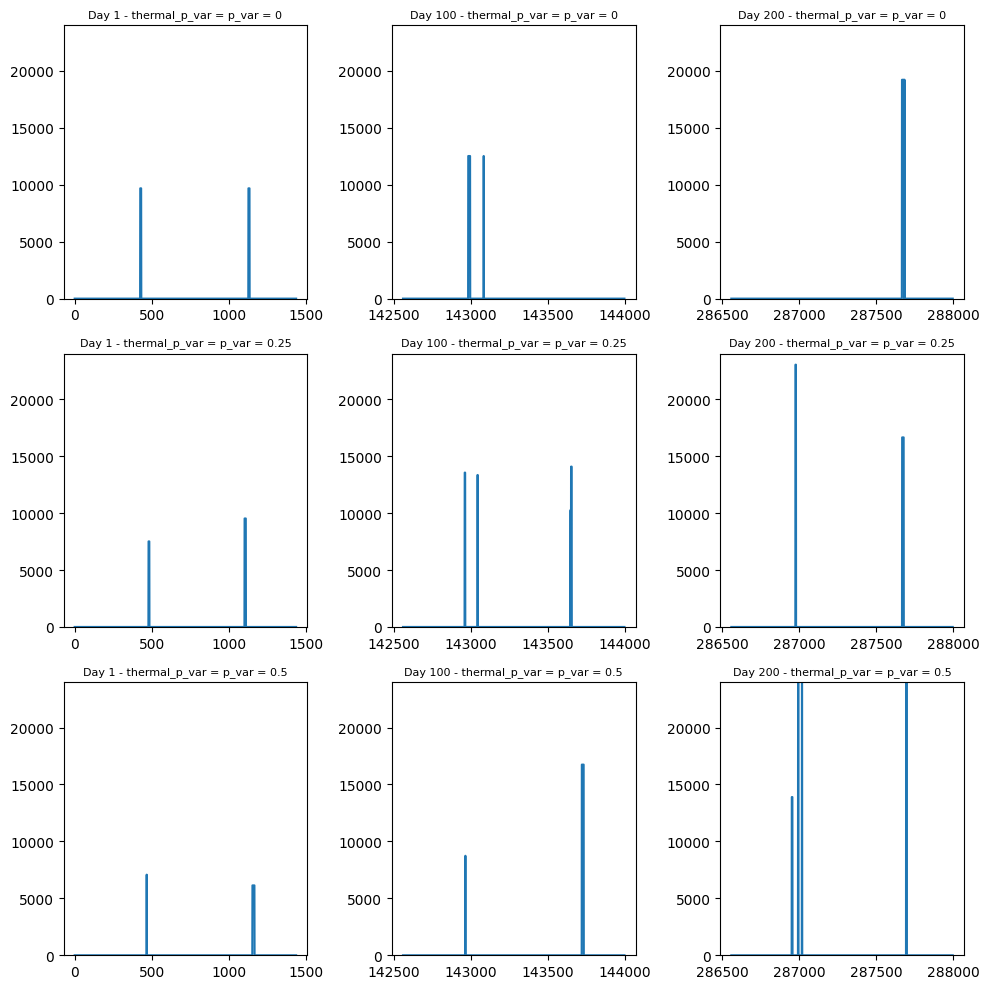

In [8]:
days_to_plot = [1,100,200] # which days of the year to plot

fig, axes = plt.subplots(ncols=len(days_to_plot), nrows=sensitivity_results.shape[1], figsize=(10, 10)) 

for j,day in enumerate(days_to_plot):
    for i, col in enumerate(sensitivity_results):
        sensitivity_results[col].iloc[1440*(day-1):1440*(day)].plot(ax=axes[i,j]) # just plot for the first day
        axes[i,j].set_title(f"Day {day} - thermal_p_var = {col}",fontsize=8)
        axes[i,j].set_ylim(0,24000)

    

plt.tight_layout()
plt.show()

As it can be observed, the power consumption of hot water supply technology varies across different days of the year, primarily due to fluctuations in the nominal power. When adjusting the parameter **thermal_p_var** from 0, indicating no variability in power consumption due to user preferences, to higher values, which signify the probability of changes in hot water temperature, the power consumption also varies accordingly.